# Desafío - Pruebas de hipótesis

<br><br>

**Mi nombre:** Julio Valdés

**Prefesor:** Gabriel Tamayo

**Generación:** G5




* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

## 1. Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible
rechazar la hipótesis nula.

1. 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados: El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental. Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.

Con un valor de prueba (estadístico) de 11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?

### Se rechaza la hipotesis nula debido a que el estadístico es significativamente superior al puntaje de corte

2. Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos (mujeres y hombres), donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?


### Dado que existe una muestra pequeña no es adecuado utilizar una distribución asintóticamente normal, sino una distribución T. Por lo que no es concluyente la sugerencia del investigador.

## 2. Importe la base de datos utilizada la sesión presencial anterior

Agrege una serie de variables binarias por cada continente de la variable region.

tip: Utilice np.where para ello.

De manera similar a la sesión anterior, enfóquese en las siguientes variables:
* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life.
* Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school.

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('nations.csv', encoding='ISO-8859-1')
df['is_africa'] = np.where(df['region'] == 'Africa', 1, 0)
df['is_americas'] = np.where(df['region'] == 'Americas', 1, 0)
df['is_asia'] = np.where(df['region'] == 'Asia', 1, 0)
df['is_europe'] = np.where(df['region'] == 'Europe', 1, 0)
df['is_oceania'] = np.where(df['region'] == 'Oceania', 1, 0)
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,is_africa,is_americas,is_asia,is_europe,is_oceania
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


## 3. Implemente una función de prueba de hipótesis
La función debe ingresar los siguientes argumentos:
* df : La tabla de datos.
* variable : La variable a analizar.
* binarize : El indicador binario a utilizar.

tips:
* Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
*  Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
*  Reporte las medias para cada grupo (0 y 1).
* Reporte la diferencia de entre las medias.
* Reporte los valores t y p

In [10]:
import scipy.stats as stats
def prueba_hipotesis(df, variable, binarize):
    muestra0 = df.query("{} == 0".format(binarize))[variable].dropna()
    muestra1 = df.query("{} == 1".format(binarize))[variable].dropna()
    t, pval = stats.ttest_ind(muestra0, muestra1)
    print("La media de {} con {} == 1 es {}".format(variable, binarize, muestra1.mean()))
    print("La media de {} del resto del mundo es {}".format(variable, muestra0.mean()))
    print("La diferencia entre las medias es {}".format(muestra1.mean() - muestra0.mean()))
    print("Estadístico = {}".format(t))
    print("P-value = {}".format(pval))
    

prueba_hipotesis(df, 'literacy', 'is_africa')
prueba_hipotesis(df, 'literacy', 'is_americas')
prueba_hipotesis(df, 'literacy', 'is_oceania')

La media de literacy con is_africa == 1 es 65.30851067887976
La media de literacy del resto del mundo es 90.19857935471968
La diferencia entre las medias es -24.890068675839927
Estadístico = 8.909991173873896
P-value = 3.3857112156459963e-15
La media de literacy con is_americas == 1 es 89.30124988555909
La media de literacy del resto del mundo es 80.18217380357825
La diferencia entre las medias es 9.119076081980836
Estadístico = -1.953805549546212
P-value = 0.05282297025501065
La media de literacy con is_oceania == 1 es 81.98000030517578
La media de literacy del resto del mundo es 81.51596141228309
La diferencia entre las medias es 0.4640388928926882
Estadístico = -0.05211194697890982
P-value = 0.9585176817316319


## 4. Implemente una función que grafique los histogramas para ambas muestras.

Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la
variable es 1 y 0, respectivamente.

tips: 
* Incluya el método hist de matplotlib.pyplot.
* Incluya los argumentos alpha y label .
* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

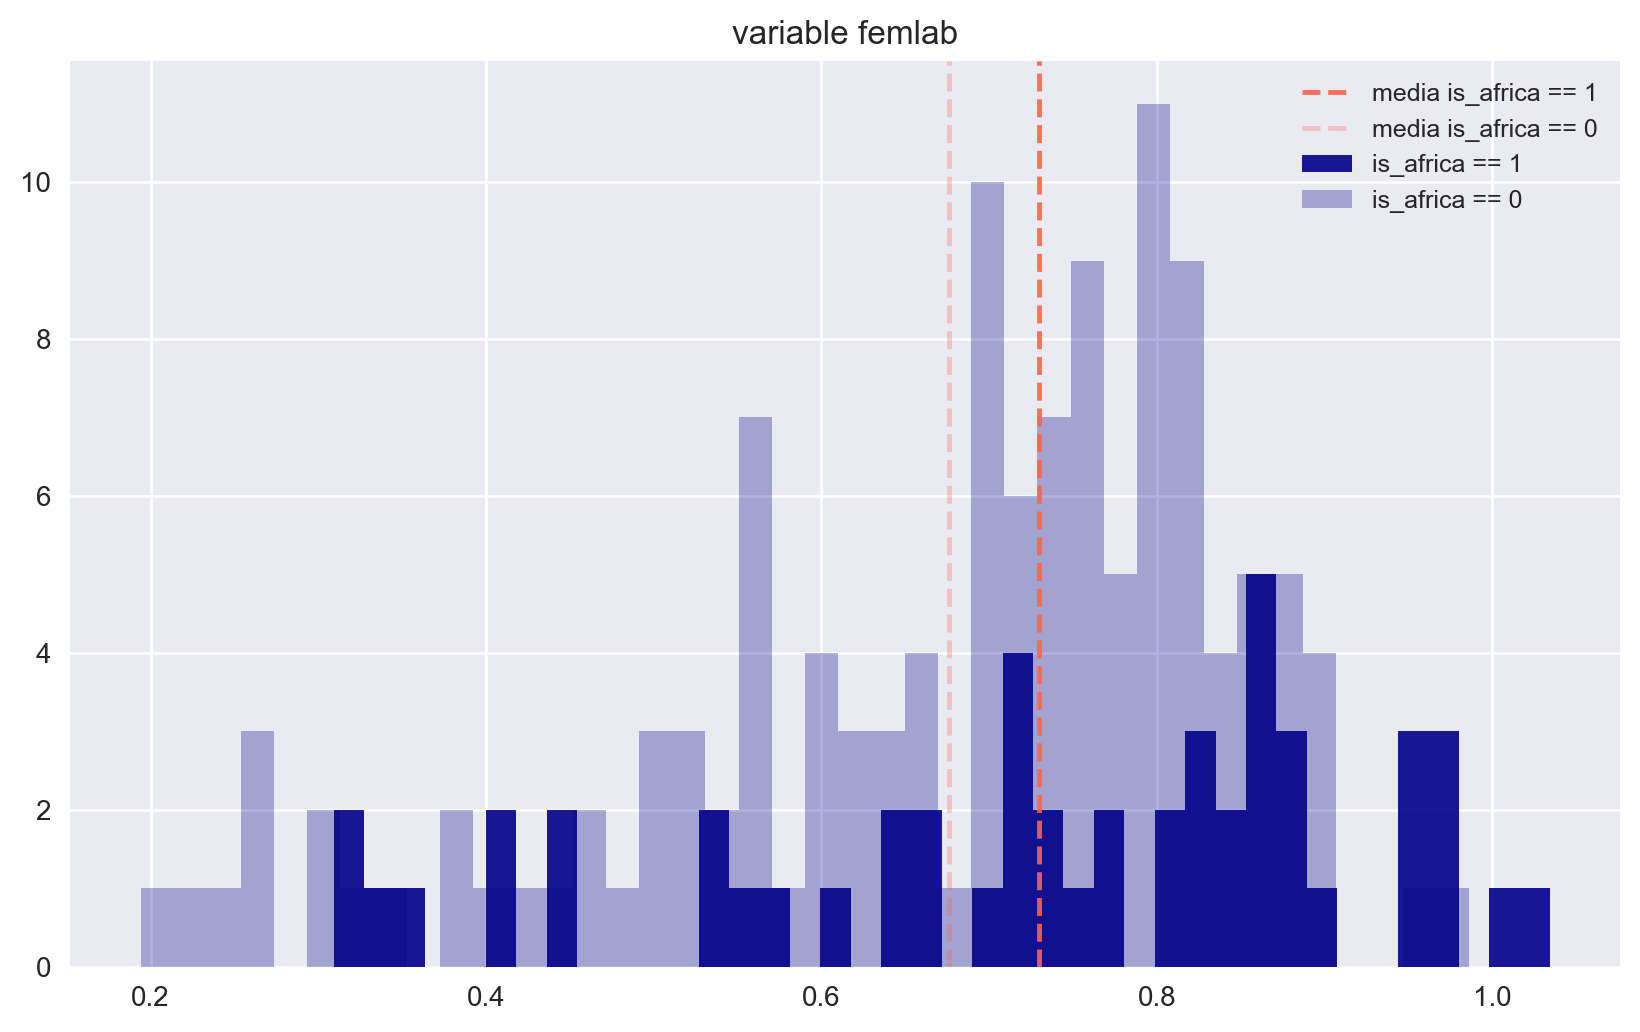

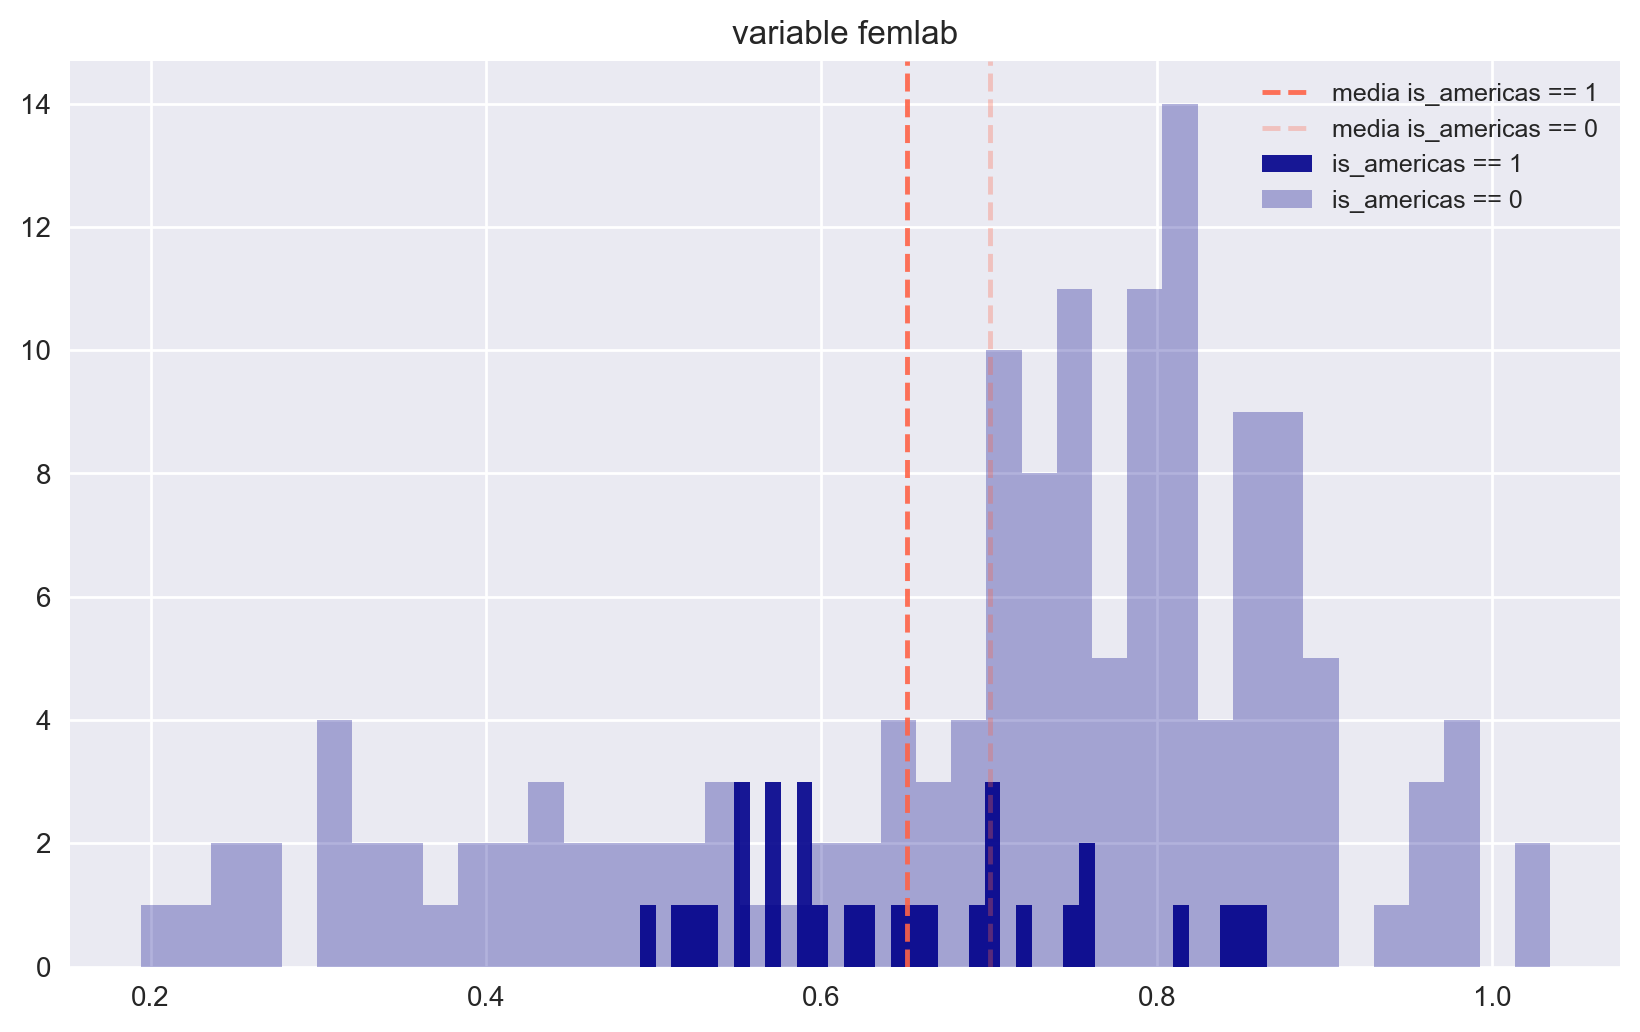

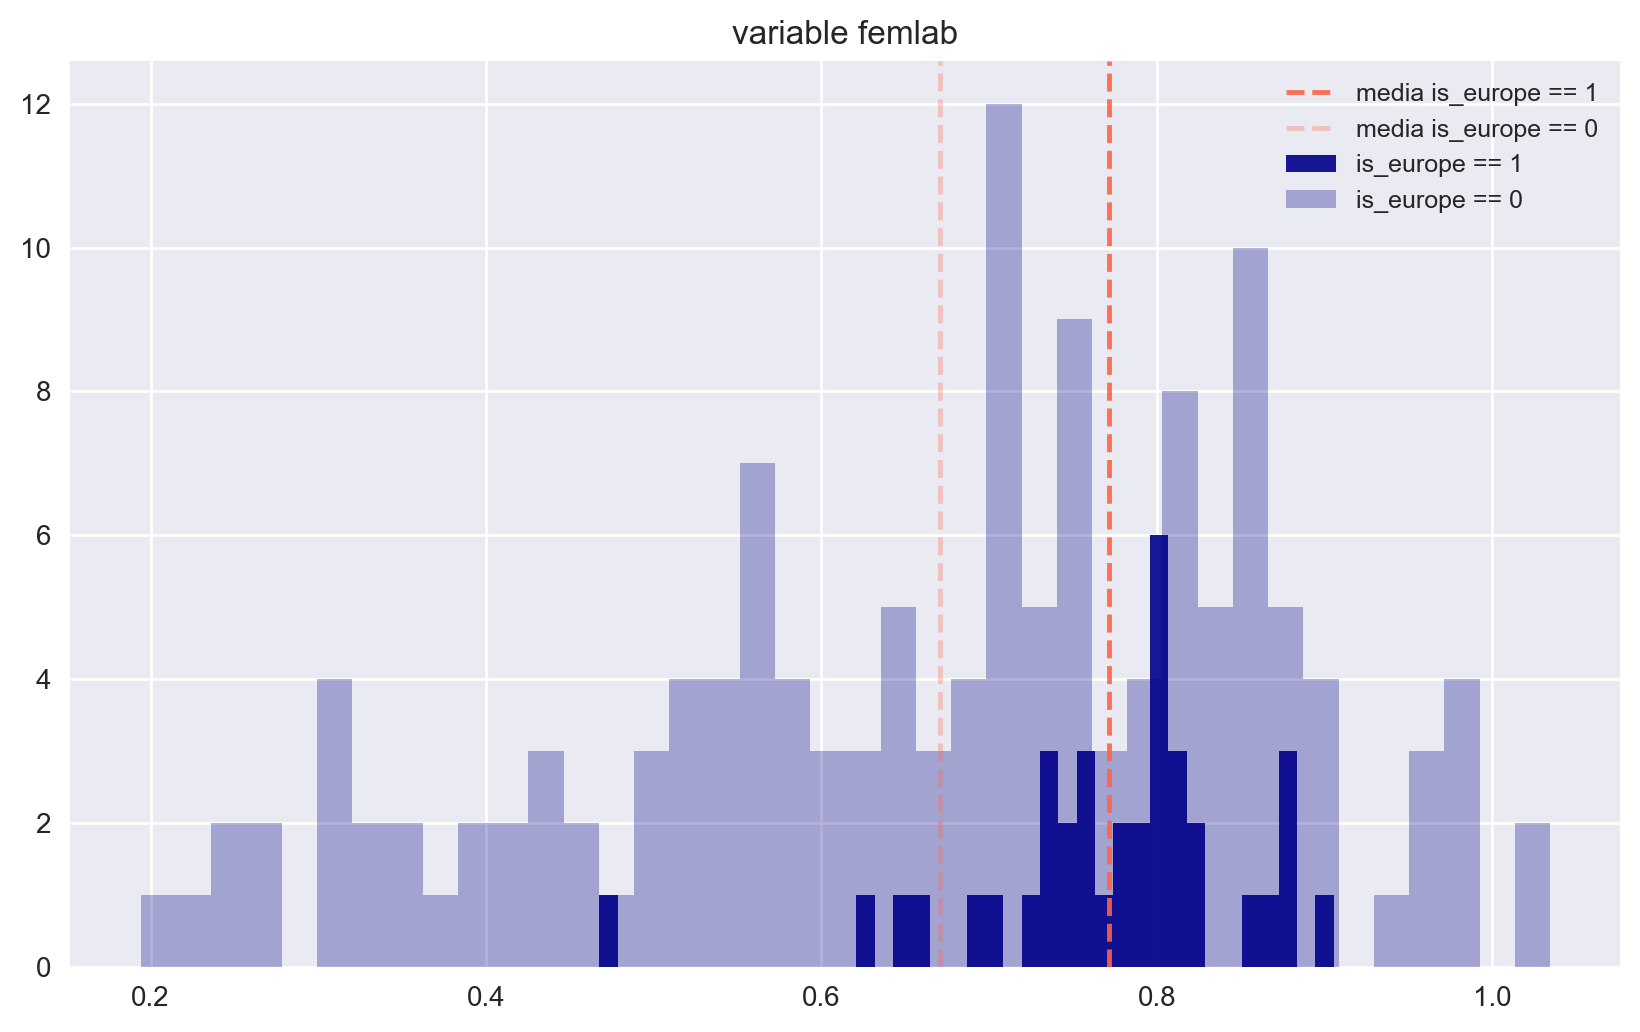

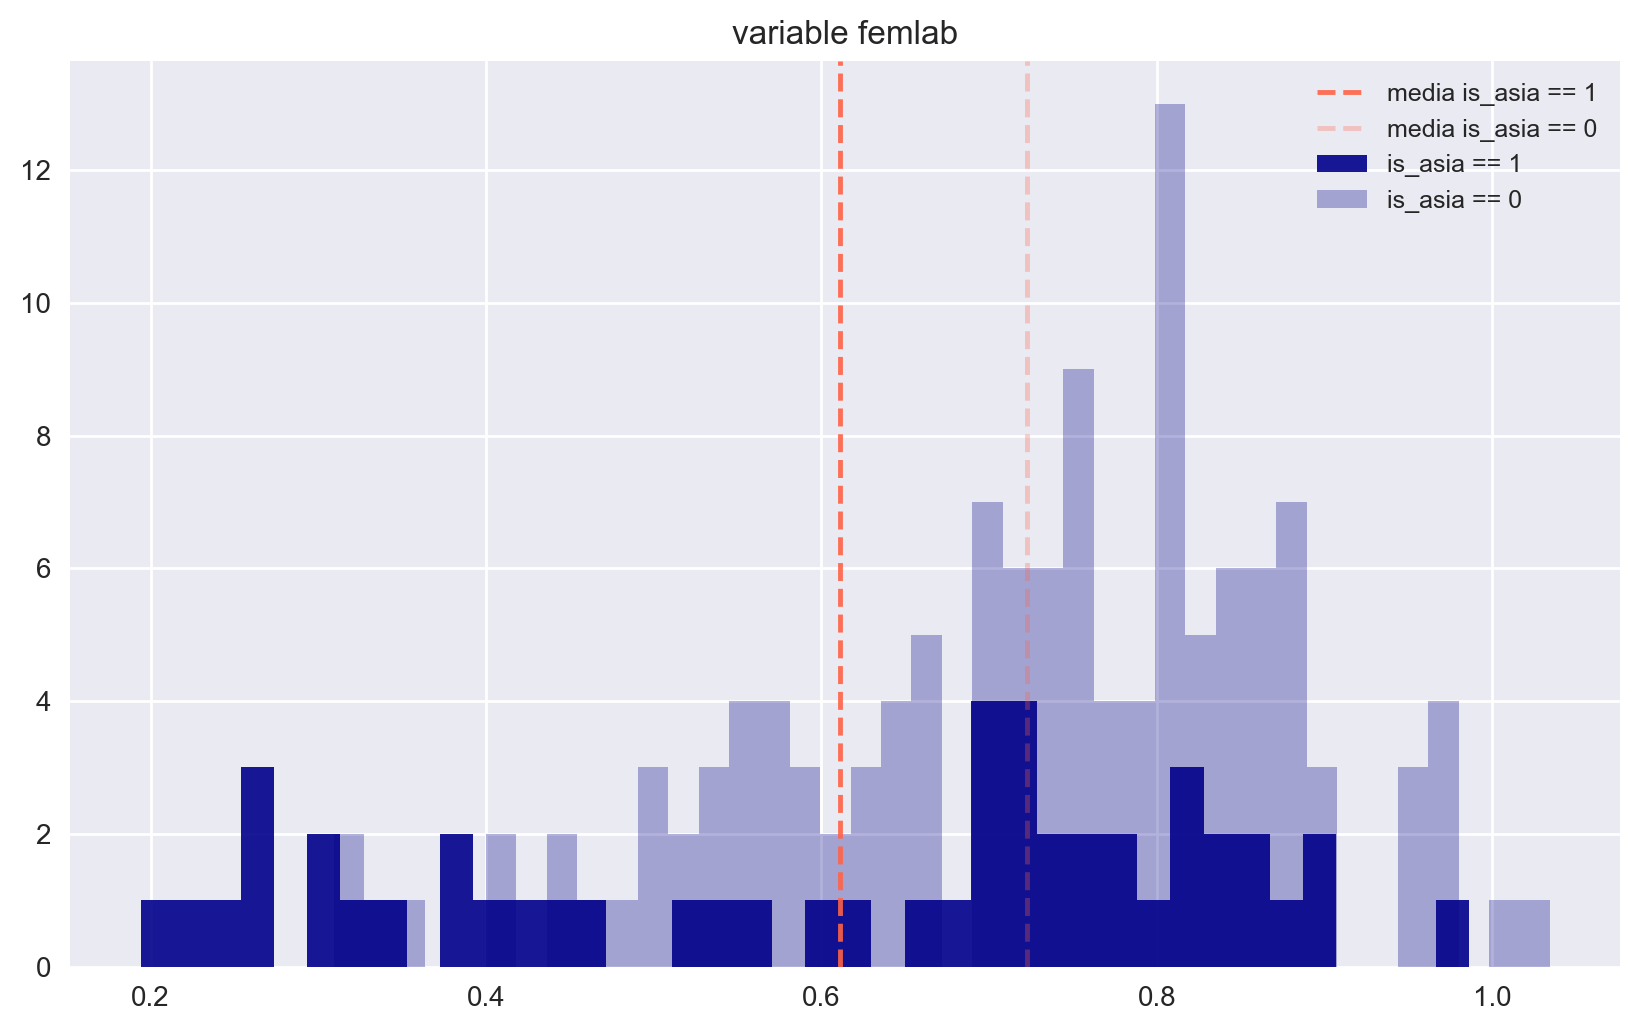

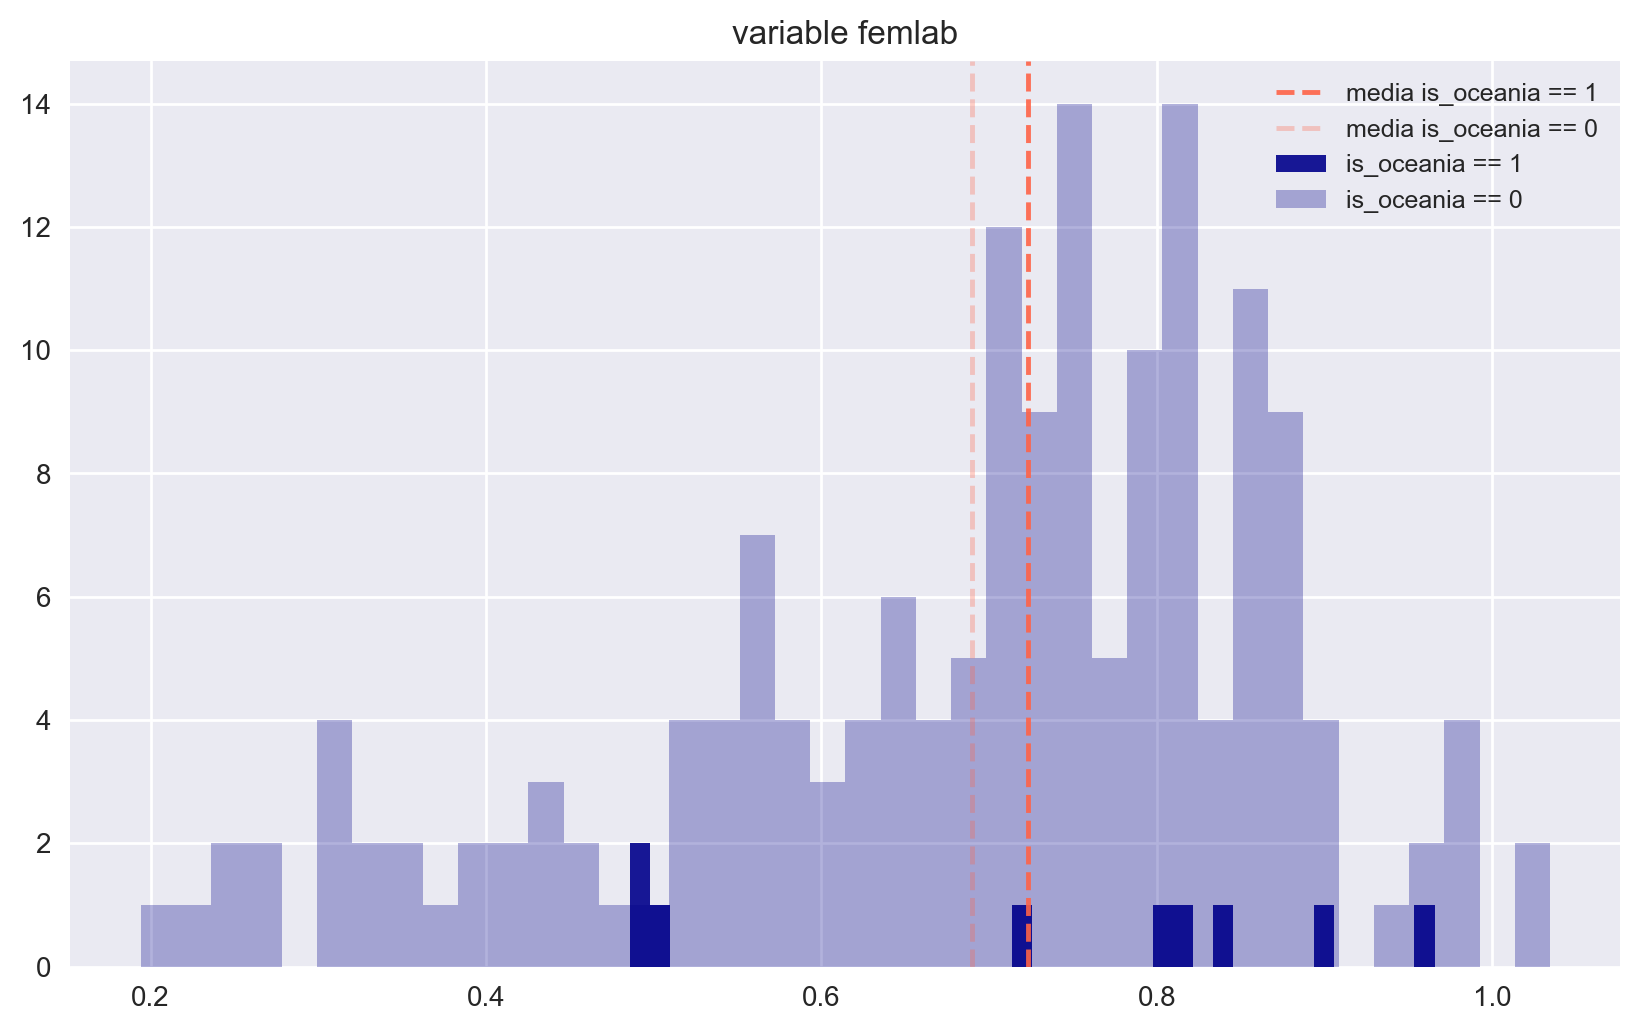

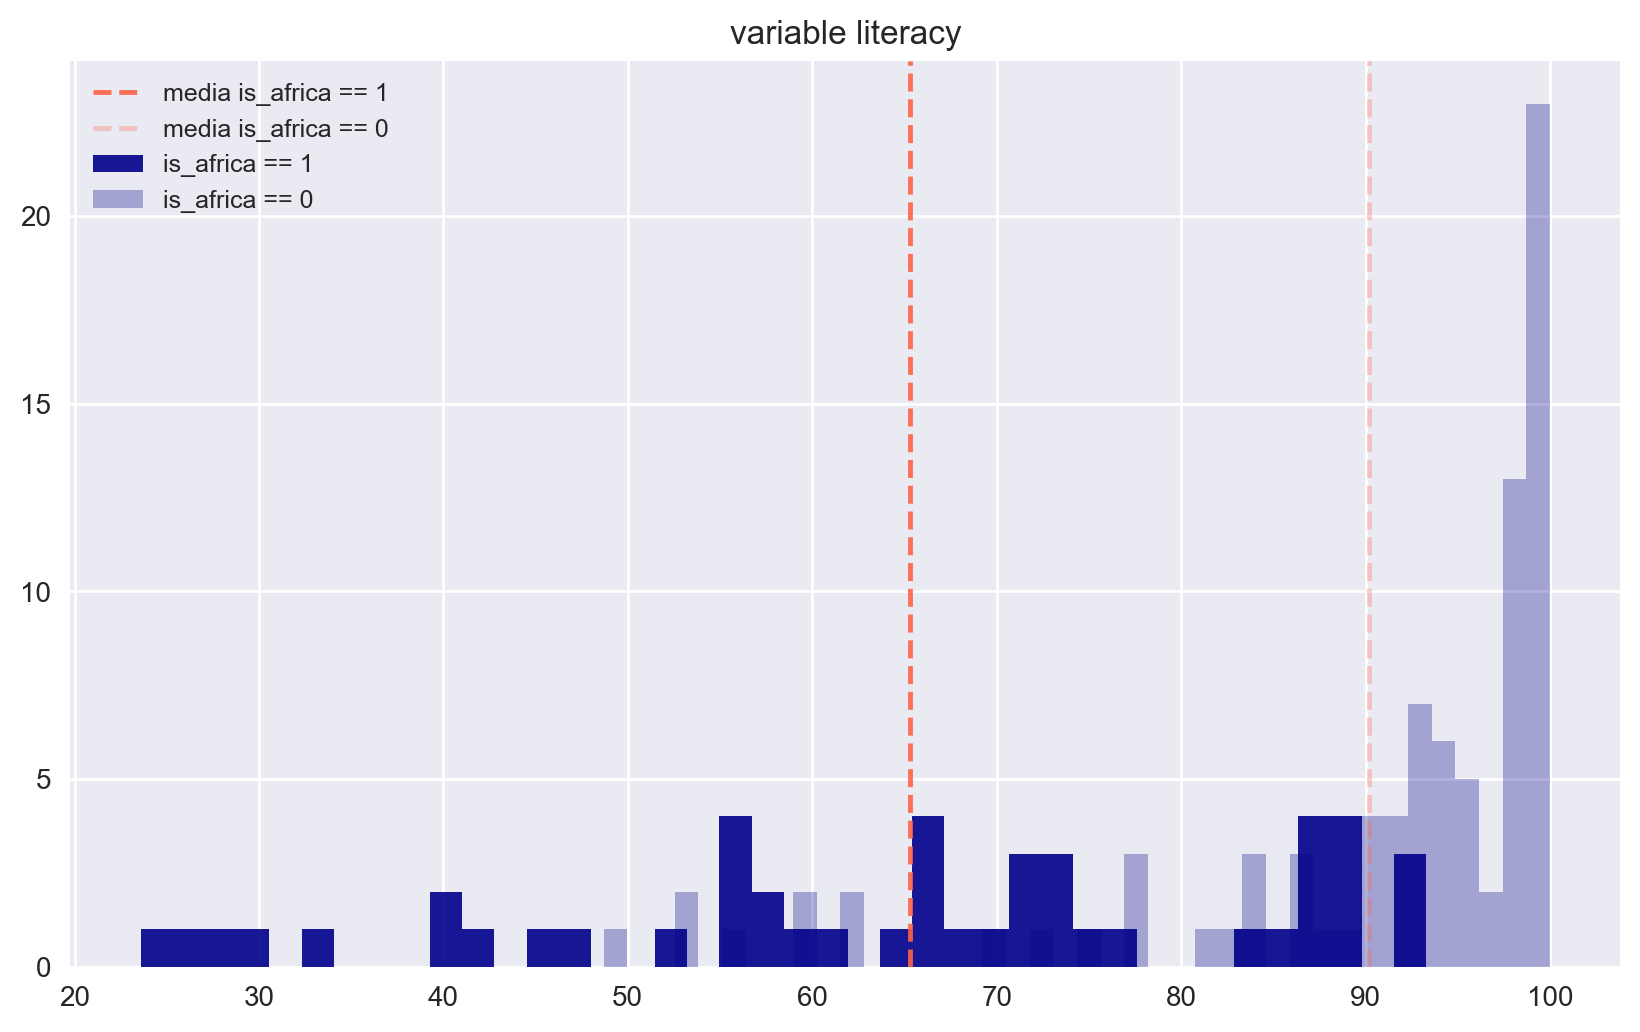

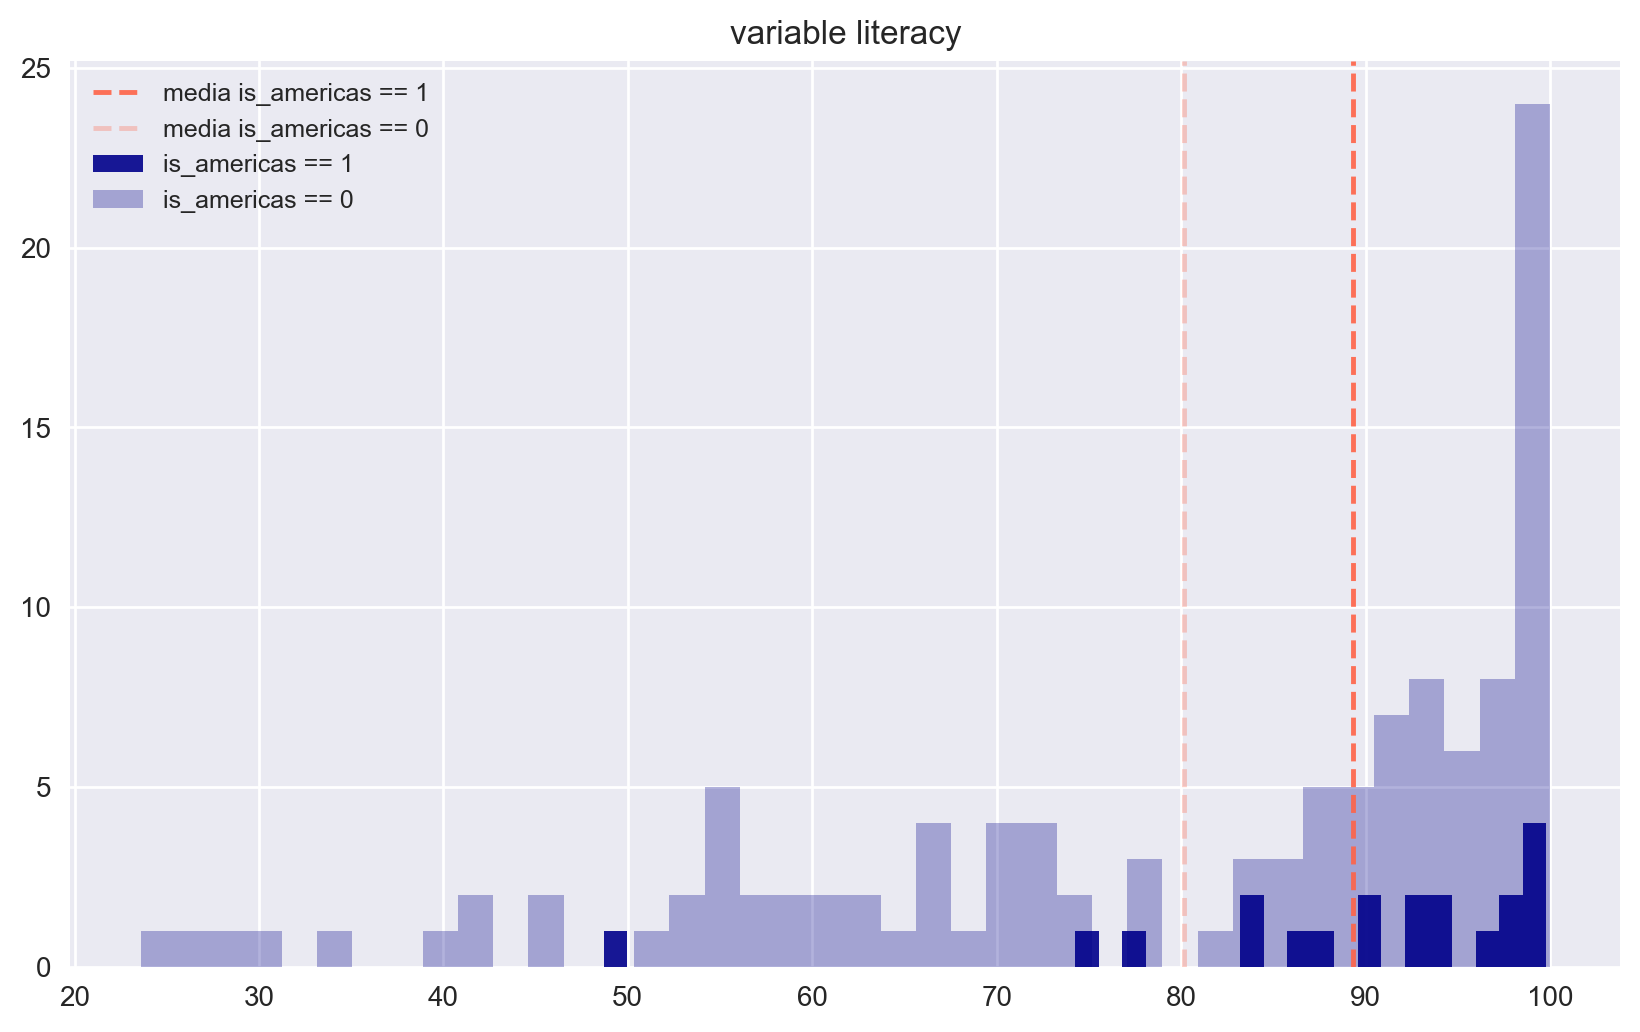

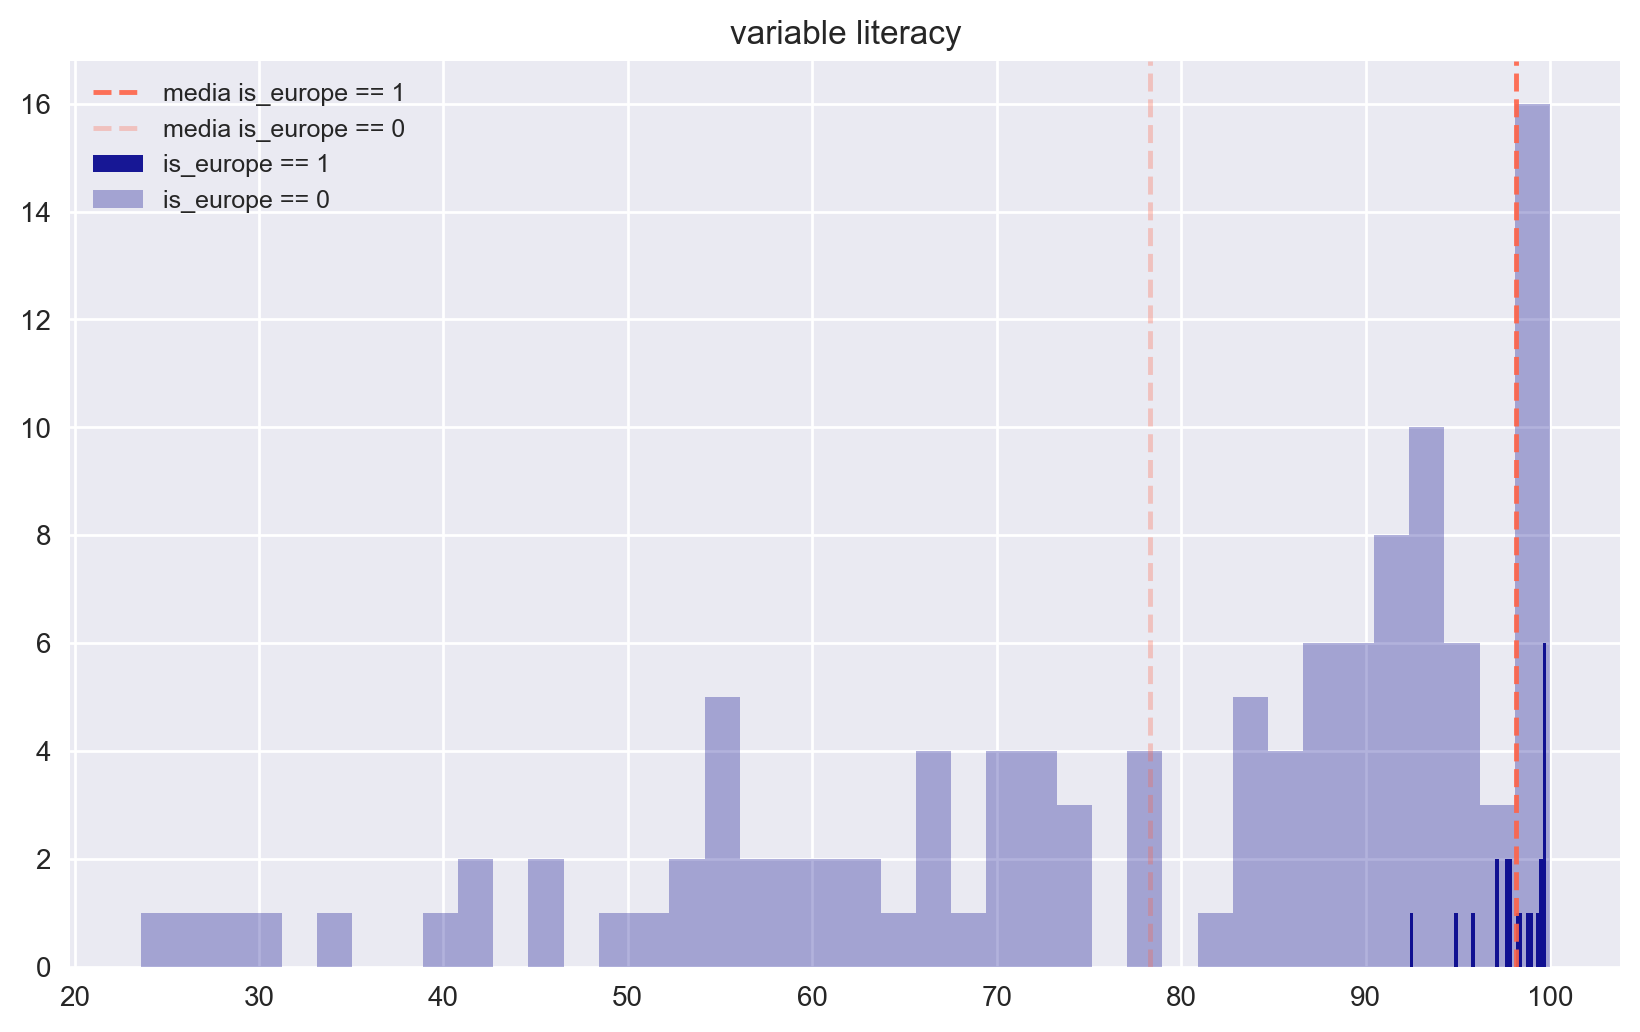

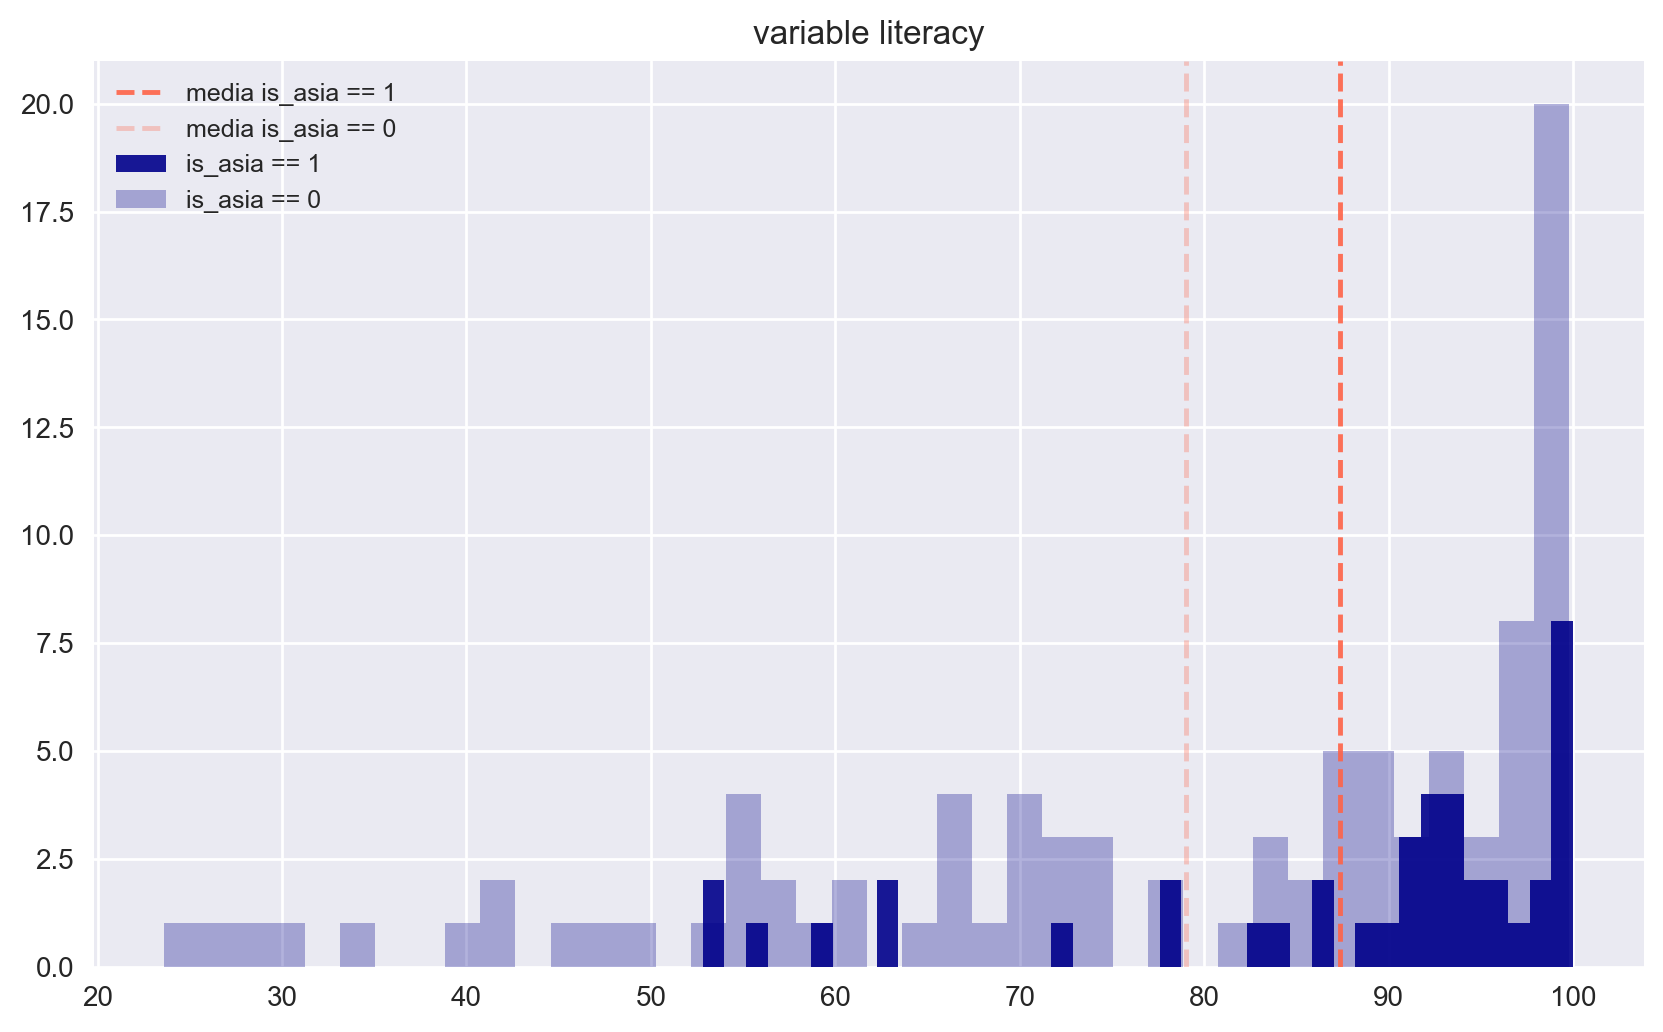

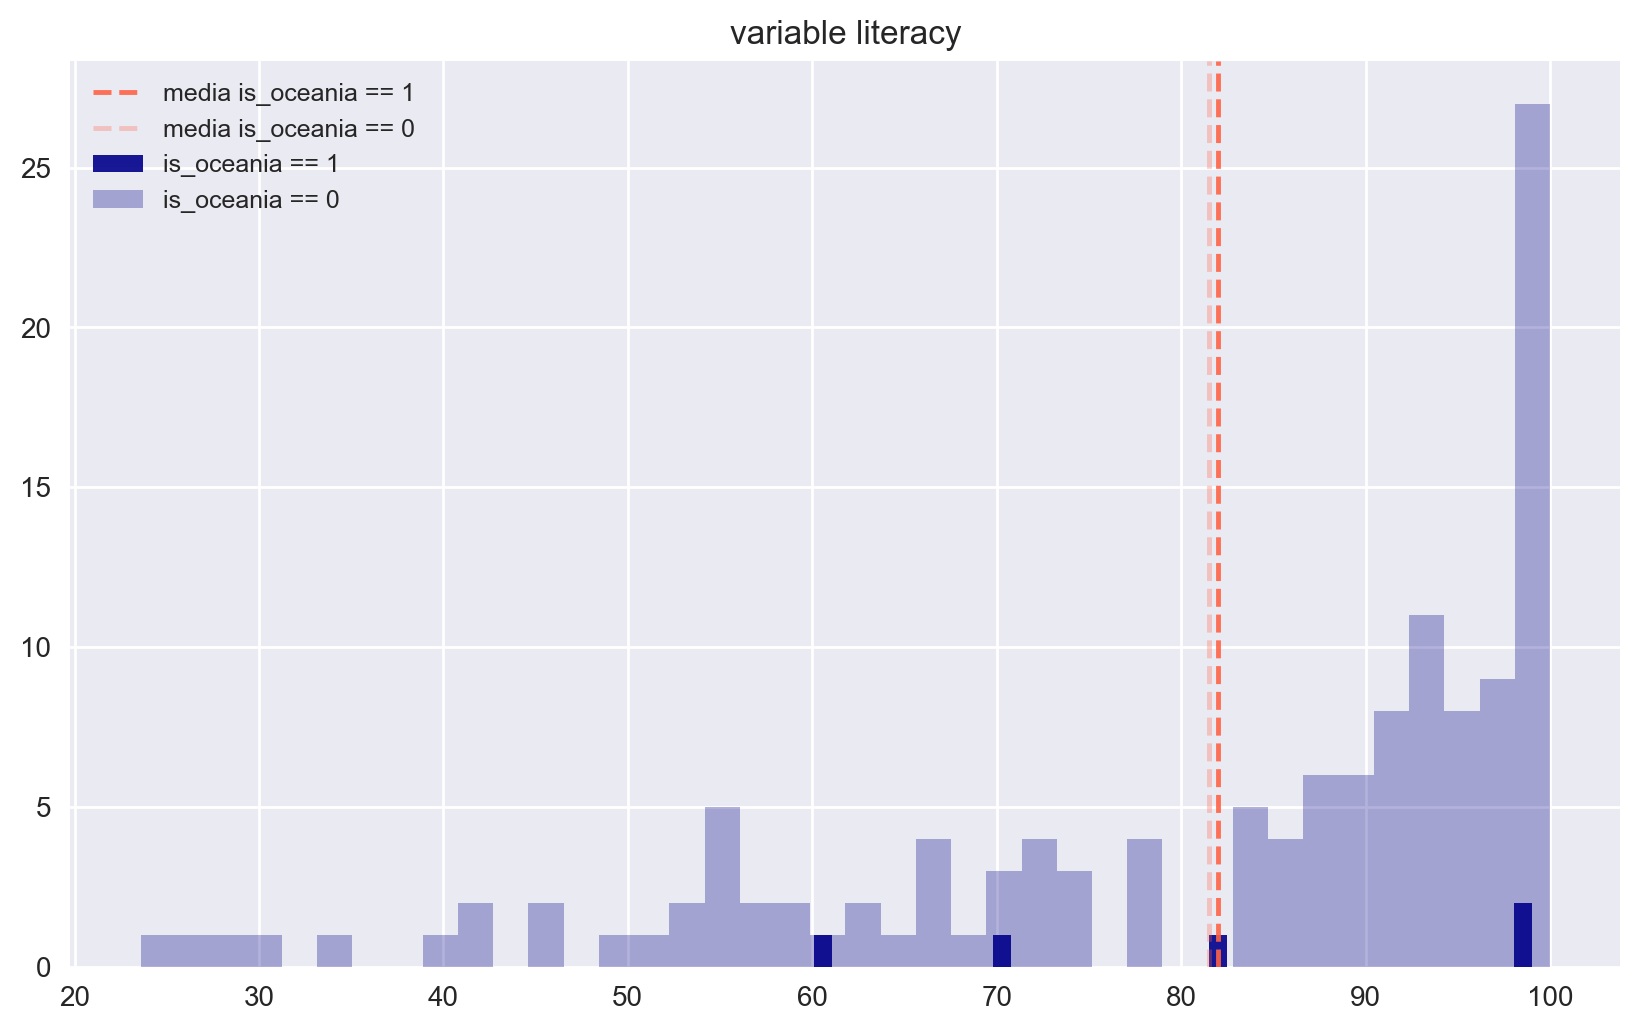

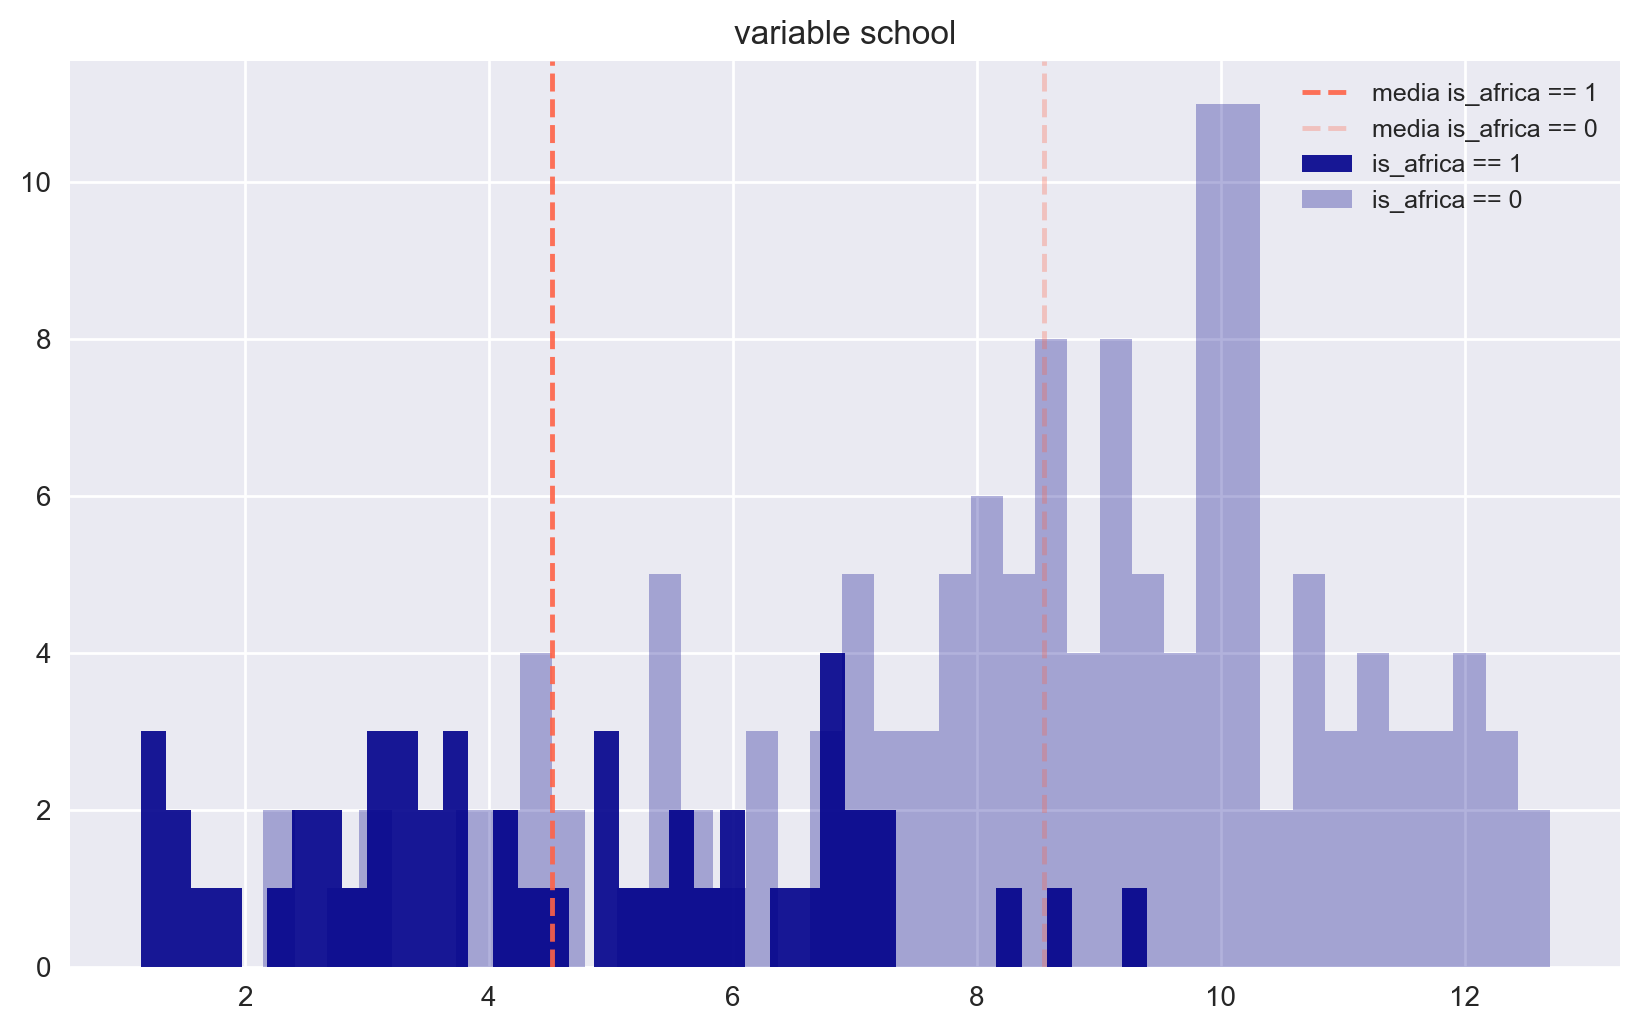

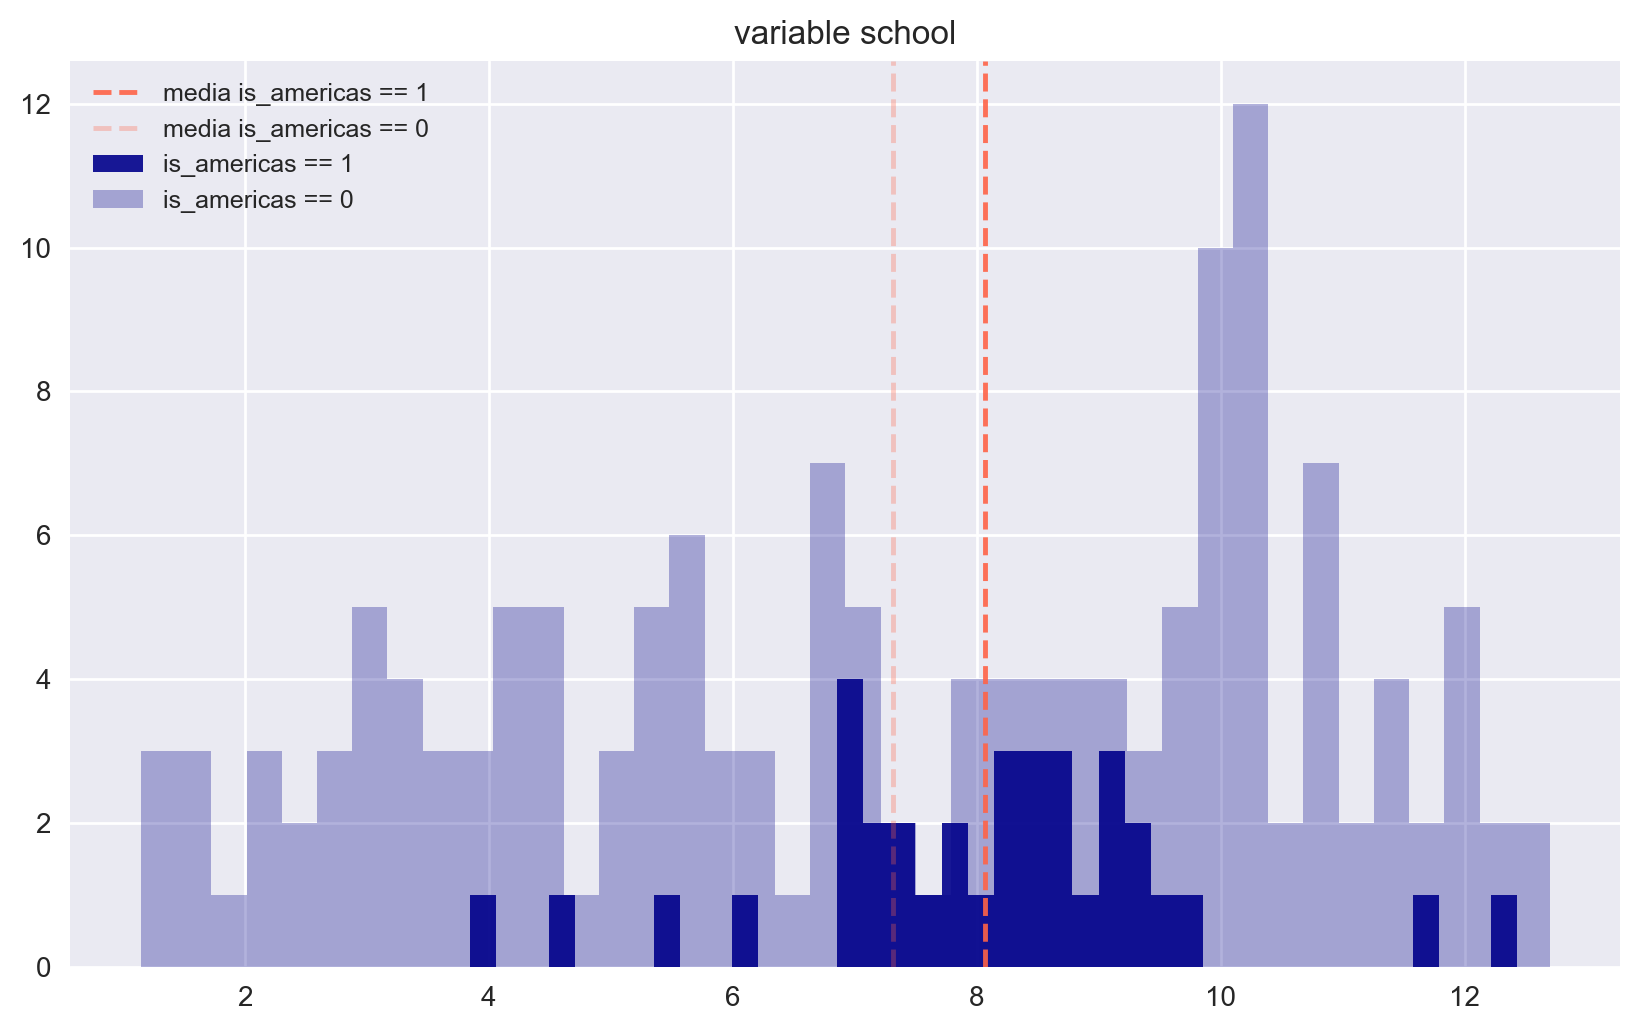

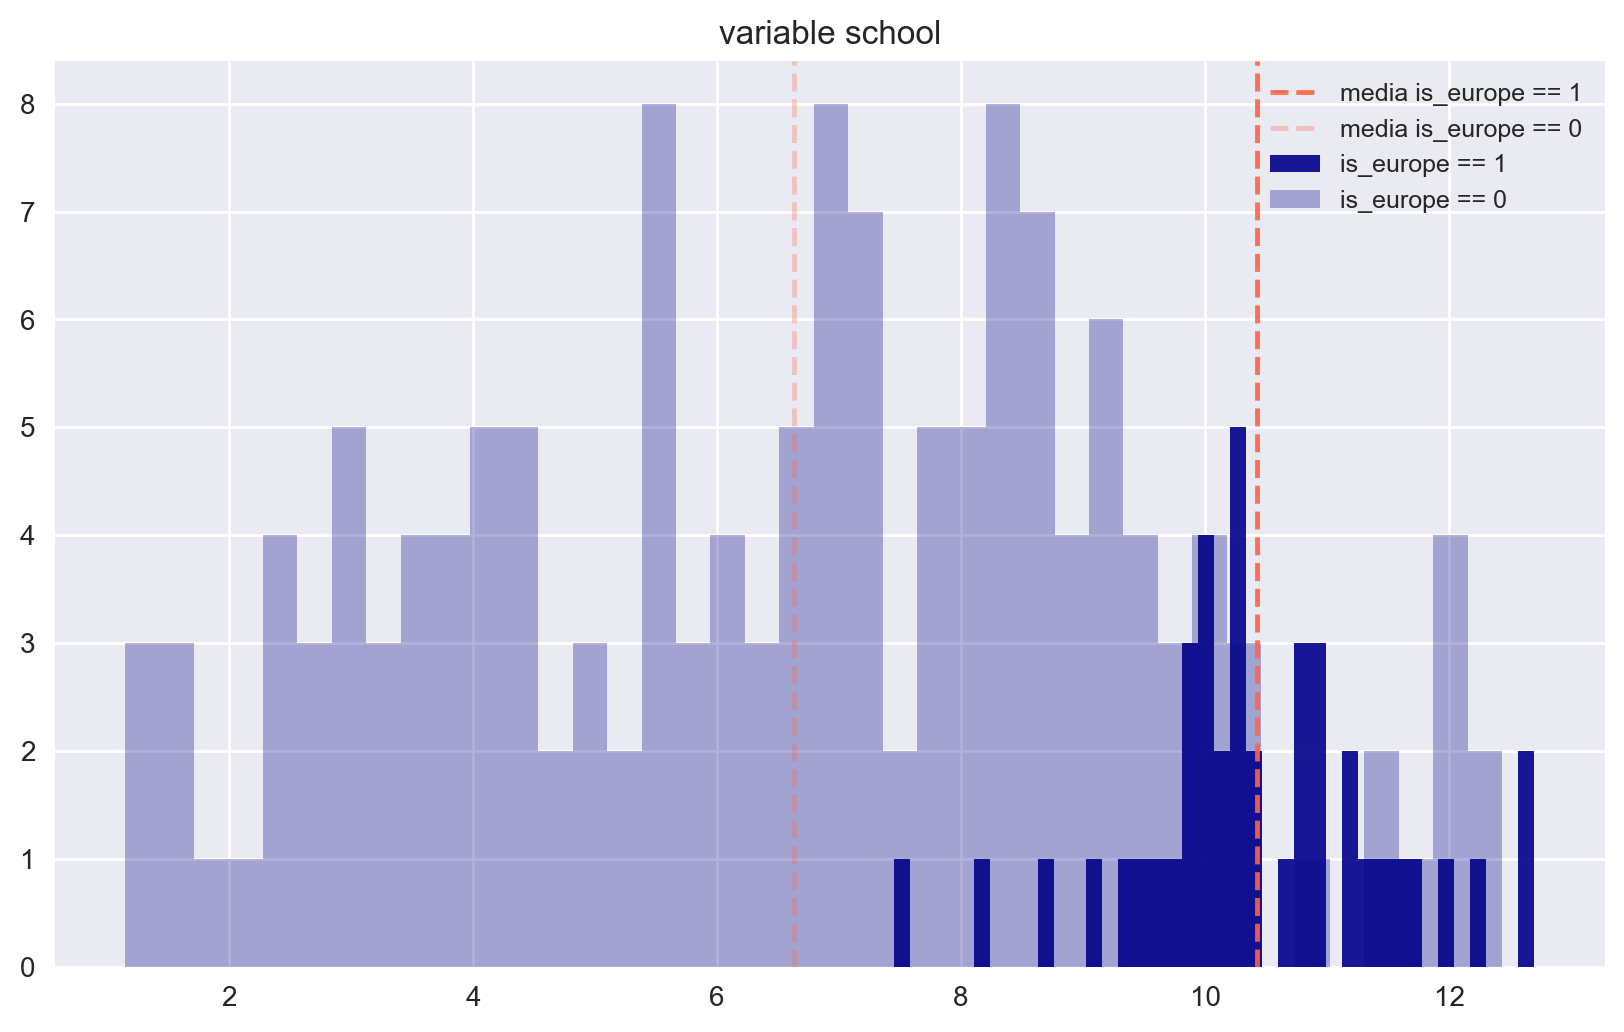

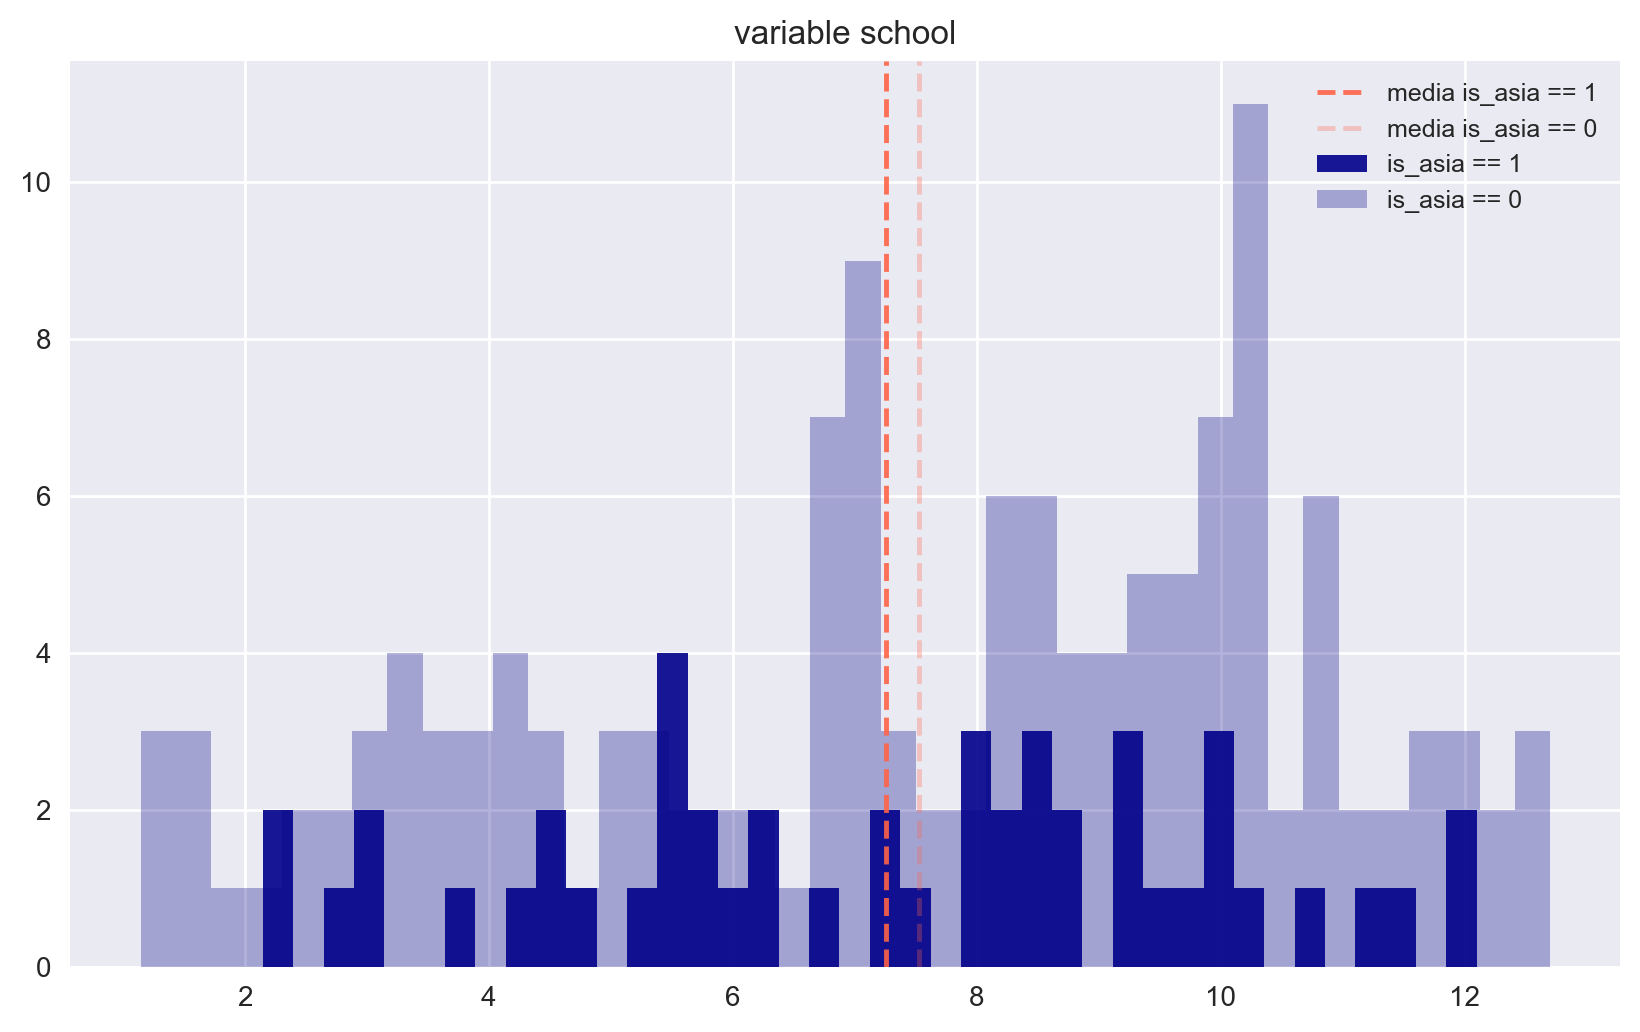

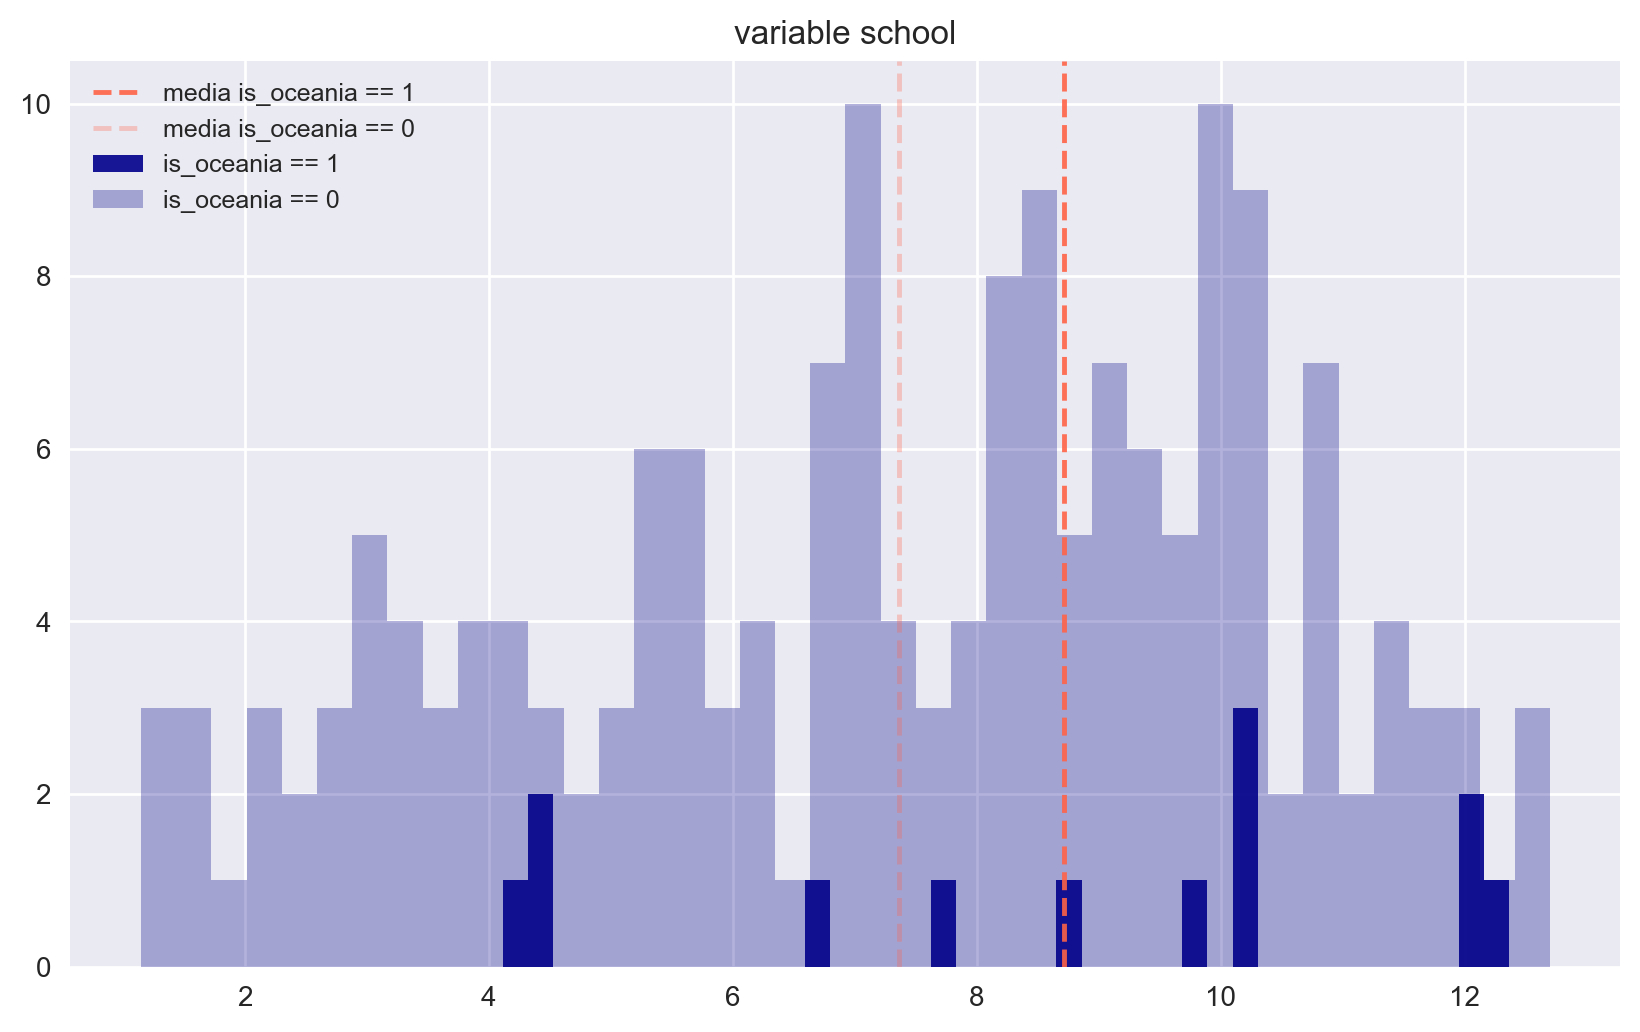

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

def grafica_histograma(dataframe, variable, binarize):
    muestra0 = df.query("{} == 0".format(binarize))[variable].dropna()
    muestra1 = df.query("{} == 1".format(binarize))[variable].dropna()
    plt.figure()
    plt.hist(muestra1, alpha=.9, color='darkblue', bins=40, label="{} == 1".format(binarize))
    plt.hist(muestra0, alpha=.3, color='darkblue', bins=40, label="{} == 0".format(binarize))
    plt.axvline(muestra1.mean(), color = 'tomato', alpha=.9, linestyle = '--', label="media {} == 1".format(binarize))
    plt.axvline(muestra0.mean(), color = 'tomato', alpha=.3, linestyle = '--', label="media {} == 0".format(binarize))
    plt.title("variable {}".format(variable))
    plt.legend(loc=0, fontsize = 9)

for var in ['femlab', 'literacy', 'school']:
    for binarize in ['is_africa', 'is_americas', 'is_europe', 'is_asia', 'is_oceania']:
        grafica_histograma(df, var, binarize)

#### Asia y Europa son las regiones que presentan una mayor diferencia en la tasa entre hombres y mujeres en el mercado laboral en relación al resto del mundo. Al realizar una prueba de hipótesis se confirma con la diferencia entre las medias, el estadístico y el p-value.
#### Asia tiene una diferencia de -0.11 por lo cual se situa por debajo del promedio del resto del mundo. 
#### Europa tiene una diferencia de 0.10  por lo cual se situa por sobre el promedio del resto del mundo.

In [73]:
prueba_hipotesis(df, 'femlab', 'is_asia')
prueba_hipotesis(df, 'femlab', 'is_europe')

La media de femlab con is_asia == 1 es 0.6113142879033575
La media de femlab del resto del mundo es 0.7223421863745898
La diferencia entre las medias es -0.11102789847123229
Estadístico = 3.7455196595318414
P-value = 0.00024413257519365062
La media de femlab con is_europe == 1 es 0.7716324264938766
La media de femlab del resto del mundo es 0.6704557155924183
La diferencia entre las medias es 0.1011767109014583
Estadístico = -3.063523760334362
P-value = 0.0025335604834548654


#### Africa y Europa son las regiones que presentan una mayor diferencia en la tasa de alfabetismo en relación al resto del mundo. Al realizar una prueba de hipótesis se confirma con la diferencia entre las medias, el estadístico y el p-value.
#### Africa tiene una diferencia de -24.89 por lo cual se situa por debajo del promedio del resto del mundo.
#### Europa tiene una diferencia de 19.88 por lo cual se situa por sobre el promedio del resto del mundo.

In [71]:
prueba_hipotesis(df, 'literacy', 'is_africa')
prueba_hipotesis(df, 'literacy', 'is_europe')

La media de literacy con is_africa == 1 es 65.30851067887976
La media de literacy del resto del mundo es 90.19857935471968
La diferencia entre las medias es -24.890068675839927
Estadístico = 8.909991173873896
P-value = 3.3857112156459963e-15
La media de literacy con is_europe == 1 es 98.17727279663086
La media de literacy del resto del mundo es 78.2926989698832
La diferencia entre las medias es 19.884573826747655
Estadístico = -4.71843149821332
P-value = 5.935608765865936e-06


#### Africa y Europa son las regiones que presentan una mayor diferencia en el promedio de años de escolaridad en relación al resto del mundo. Al realizar una prueba de hipótesis se confirma con la diferencia entre las medias, el estadístico y el p-value.
#### Africa tiene una diferencia de -4.03 por lo cual se situa por debajo del promedio del resto del mundo.
#### Europa tiene una diferencia de 3.79 por lo cual se situa por sobre el promedio del resto del mundo.

In [72]:
prueba_hipotesis(df, 'school', 'is_africa')
prueba_hipotesis(df, 'school', 'is_europe')

La media de school con is_africa == 1 es 4.522875827901504
La media de school del resto del mundo es 8.5523114274018
La diferencia entre las medias es -4.029435599500297
Estadístico = 10.415811831777058
P-value = 2.6352830456717332e-20
La media de school con is_europe == 1 es 10.421544679781281
La media de school del resto del mundo es 6.632993203442113
La diferencia entre las medias es 3.788551476339168
Estadístico = -8.524346217730443
P-value = 5.20910302336092e-15
